# train RTMDet on balloon dataset

- 使用MMDetection算法库，训练 RTMDet 气球目标检测算法，可以适当调参，提交测试集评估指标


In [1]:
import os
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
import json

PROJECT_ROOT = "/home/louzekun/projects/mmlab/mmdet"
os.chdir(PROJECT_ROOT)
os.getcwd()

'/mnt/data/ai4phys/louzekun/projects/mmlab/mmdet'

## train

In [2]:
!ls logs/

20230611_140010  20230611_193637		   epoch_190.pth
20230611_192241  balloon_RTMDet.py		   epoch_195.pth
20230611_192602  best_coco_bbox_mAP_epoch_110.pth  epoch_200.pth
20230611_193154  best_coco_bbox_mAP_epoch_90.pth   last_checkpoint


In [3]:
# !python ./tools/train.py ./balloon_RTMDet.py --work-dir ./logs
!cat /home/louzekun/projects/mmlab/mmdet/logs/20230611_193637/20230611_193637.log | tail -16


2023/06/11 19:54:53 - mmengine - INFO - Saving checkpoint at 195 epochs
2023/06/11 19:54:56 - mmengine - INFO - Switch pipeline now!
2023/06/11 19:55:00 - mmengine - INFO - Exp name: balloon_RTMDet_20230611_193637
2023/06/11 19:55:00 - mmengine - INFO - Epoch(train) [196][4/4]  lr: 1.3557e-05  eta: 0:00:19  time: 1.5528  data_time: 1.4511  memory: 2012  loss: 0.0000  loss_cls: 0.0000  loss_bbox: 0.0000
2023/06/11 19:55:03 - mmengine - INFO - Exp name: balloon_RTMDet_20230611_193637
2023/06/11 19:55:03 - mmengine - INFO - Epoch(train) [197][4/4]  lr: 1.3118e-05  eta: 0:00:14  time: 1.4771  data_time: 1.3752  memory: 2012  loss: 0.0000  loss_cls: 0.0000  loss_bbox: 0.0000
2023/06/11 19:55:06 - mmengine - INFO - Exp name: balloon_RTMDet_20230611_193637
2023/06/11 19:55:06 - mmengine - INFO - Epoch(train) [198][4/4]  lr: 1.2797e-05  eta: 0:00:09  time: 1.4039  data_time: 1.3020  memory: 2012  loss: 0.0000  loss_cls: 0.0000  loss_bbox: 0.0000
2023/06/11 19:55:09 - mmengine - INFO - Exp name

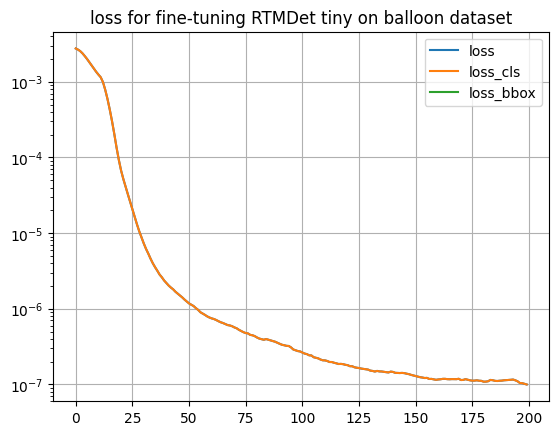

In [4]:
"""
in the log file, we can see the following:
{"lr": 0.0003846615384615385, "data_time": 2.422462582588196, "loss": 0.02636089827865362, "loss_cls": 0.02636089827865362, "loss_bbox": 0.0, "time": 3.296236217021942, "epoch": 2, "memory": 3945, "step": 4}
plot loss against step
"""
log_scalars = "/home/louzekun/projects/mmlab/mmdet/logs/20230611_193637/vis_data/scalars.json"
with open(log_scalars, 'r') as f:
    lines = f.readlines()
    scalars = [json.loads(line) for line in lines]

loss = [entry.get('loss') for entry in scalars]
loss = [l for l in loss if l is not None]
loss_cls = [entry.get('loss_cls') for entry in scalars]
loss_cls = [l for l in loss_cls if l is not None]
loss_bbox = [entry.get('loss_bbox') for entry in scalars]
loss_bbox = [l for l in loss_bbox if l is not None]
plt.plot(loss, label='loss')
plt.plot(loss_cls, label='loss_cls')
plt.plot(loss_bbox, label='loss_bbox')
plt.title('loss for fine-tuning RTMDet tiny on balloon dataset')
plt.grid()
plt.legend()
plt.yscale('log')
plt.show()

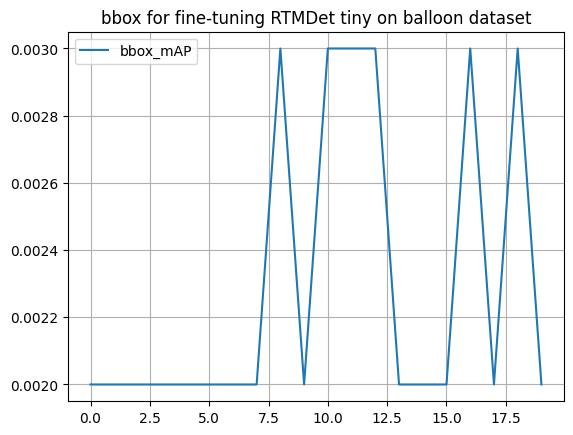

In [5]:
"""
{"coco/bbox_mAP": 0.118, "coco/bbox_mAP_50": 0.143, "coco/bbox_mAP_75": 0.141, "coco/bbox_mAP_s": 0.0, "coco/bbox_mAP_m": 0.014, "coco/bbox_mAP_l": 0.168, "data_time": 0.29770004749298096, "time": 0.33930063247680664, "step": 10}
"""
log_scalars = "/home/louzekun/projects/mmlab/mmdet/logs/20230611_193637/vis_data/scalars.json"
with open(log_scalars, 'r') as f:
    lines = f.readlines()
    scalars = [json.loads(line) for line in lines]

bbox_mAP = [entry.get('coco/bbox_mAP') for entry in scalars]
bbox_mAP = [l for l in bbox_mAP if l is not None]
plt.plot(bbox_mAP, label='bbox_mAP')
plt.title('bbox for fine-tuning RTMDet tiny on balloon dataset')
plt.grid()
plt.legend()
# plt.yscale('log')
plt.show()

```text
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.004
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.003
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.018
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.166
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.208
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.161
06/11 19:55:16 - mmengine - INFO - bbox_mAP_copypaste: 0.002 0.004 0.001 0.000 0.002 0.003
06/11 19:55:16 - mmengine - INFO - Epoch(val) [200][2/2]    coco/bbox_mAP: 0.0020  coco/bbox_mAP_50: 0.0040  coco/bbox_mAP_75: 0.0010  coco/bbox_mAP_s: 0.0000  coco/bbox_mAP_m: 0.0020  coco/bbox_mAP_l: 0.0030  data_time: 0.4046  time: 0.4360
```

## test

In [ ]:
# !python ./tools/test.py ./balloon_RTMDet.py ./logs/best_coco_bbox_mAP_epoch_90.pth --work-dir ./logs
# python ./tools/test.py ./balloon_RTMDet.py ./logs/best_coco_bbox_mAP_epoch_90.pth --work-dir ./logs